# Compare logistic regression and kNN

This is an open-ended lab.

You will:

1. Load in the wine dataset (create target, concatenate, normalize predictors)
- Do EDA on predictors
- Select predictors of interest
- Load KNeighborsClassifier and LogisticRegression from sklearn
- Compare performance between the two using stratified cross-validation
- [Optional bonus] Plot the results of kNN vs. Logistic regression using the plotting functions I wrote yesterday and today. You may have to modify the functions to work for you.

---

### Humor styles questions encoding reference

### 32 questions:

Subjects answered **32** different questions outlined below:

1. I usually don't laugh or joke with other people.
2. If I feel depressed, I can cheer myself up with humor.
3. If someone makes a mistake, I will tease them about it.
4. I let people laugh at me or make fun of me at my expense more than I should.
5. I don't have to work very hard to make other people laugh. I am a naturally humorous person.
6. Even when I'm alone, I am often amused by the absurdities of life.
7. People are never offended or hurt by my sense of humor.
8. I will often get carried away in putting myself down if it makes family or friends laugh.
9. I rarely make other people laugh by telling funny stories about myself.
10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.
11. When telling jokes or saying funny things, I am usually not concerned about how other people are taking it.
12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.
13. I laugh and joke a lot with my closest friends.
14. My humorous outlook on life keeps me from getting overly upset or depressed about things.
15. I do not like it when people use humor as a way of criticizing or putting someone down.
16. I don't often say funny things to put myself down.
17. I usually don't like to tell jokes or amuse people.
18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.
19. Sometimes I think of something that is so funny that I can't stop myself from saying it, even if it is not appropriate for the situation.
20. I often go overboard in putting myself down when I am making jokes or trying to be funny.
21. I enjoy making people laugh.
22. If I am feeling sad or upset, I usually lose my sense of humor.
23. I never participate in laughing at others even if all my friends are doing it.
24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.
25. I donít often joke around with my friends.
26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.
27. If I don't like someone, I often use humor or teasing to put them down.
28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.
29. I usually can't think of witty things to say when I'm with other people.
30. I don't need to be with other people to feel amused. I can usually find things to laugh about even when I'm by myself.
31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.
32. Letting others laugh at me is my way of keeping my friends and family in good spirits.

---

### Response scale:

For each question, there are 5 possible response codes ("likert scale") that correspond to different answers. There is also a code that indicates there is no response for that subject.

    1 == "Never or very rarely true"
    2 == "Rarely true"
    3 == "Sometimes true"
    4 == "Often true"
    5 == "Very often or always true
    [-1 == Did not select an answer]
    
---

### Demographics:

    age: entered as as text then parsed to an interger.
    gender: chosen from drop down list (1=male, 2=female, 3=other, 0=declined)
    accuracy: How accurate they thought their answers were on a scale from 0 to 100, answers were entered as text and parsed to an integer. They were instructed to enter a 0 if they did not want to be included in research.	

---

### 1. Load humor styles dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV

In [2]:
hsq = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-2/datasets/humor_styles/hsq_data.csv')

---

### 2. Create a target and predictor matrix

Target and predictors are up to you. 

In [3]:
hsq.head(2)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90


In [4]:
print hsq.gender.unique()
print hsq.shape

[2 1 3 0]
(1071, 39)


In [5]:
hsq = hsq[hsq.gender.isin([1,2])]
print hsq.shape

(1058, 39)


In [6]:
hsq.gender = hsq.gender.map(lambda x: 1 if x == 1 else 0)

In [7]:
y = hsq.gender.values
X = hsq[['affiliative','selfenhancing','agressive','selfdefeating','accuracy']].values
feature_names = ['affiliative','selfenhancing','agressive','selfdefeating','accuracy']

---

### 3. Perform any EDA you deem relevant on your predictors and target

In [8]:
hsq_subset = hsq[['affiliative','selfenhancing','agressive','selfdefeating','accuracy','gender']]

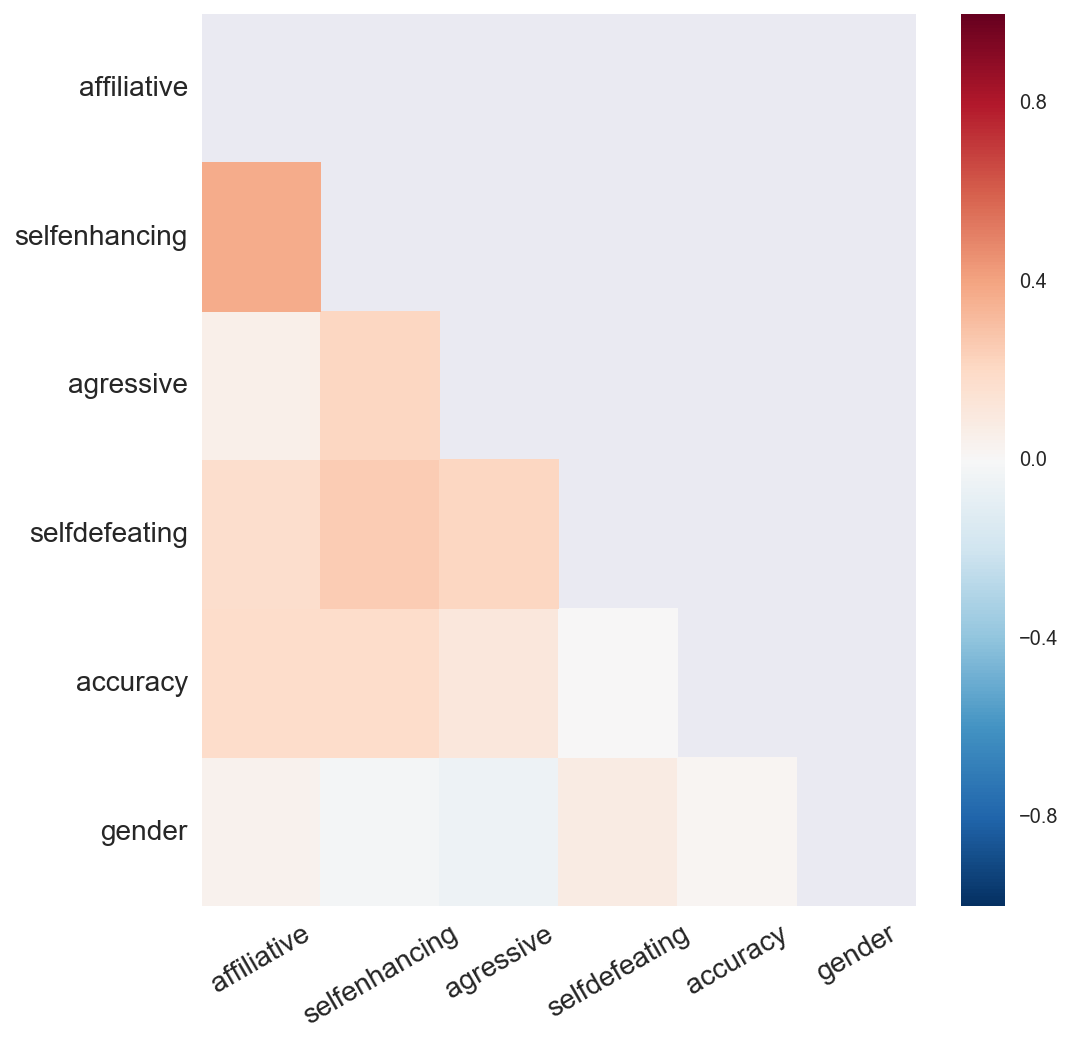

In [9]:
corrs = hsq_subset.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(8,8))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

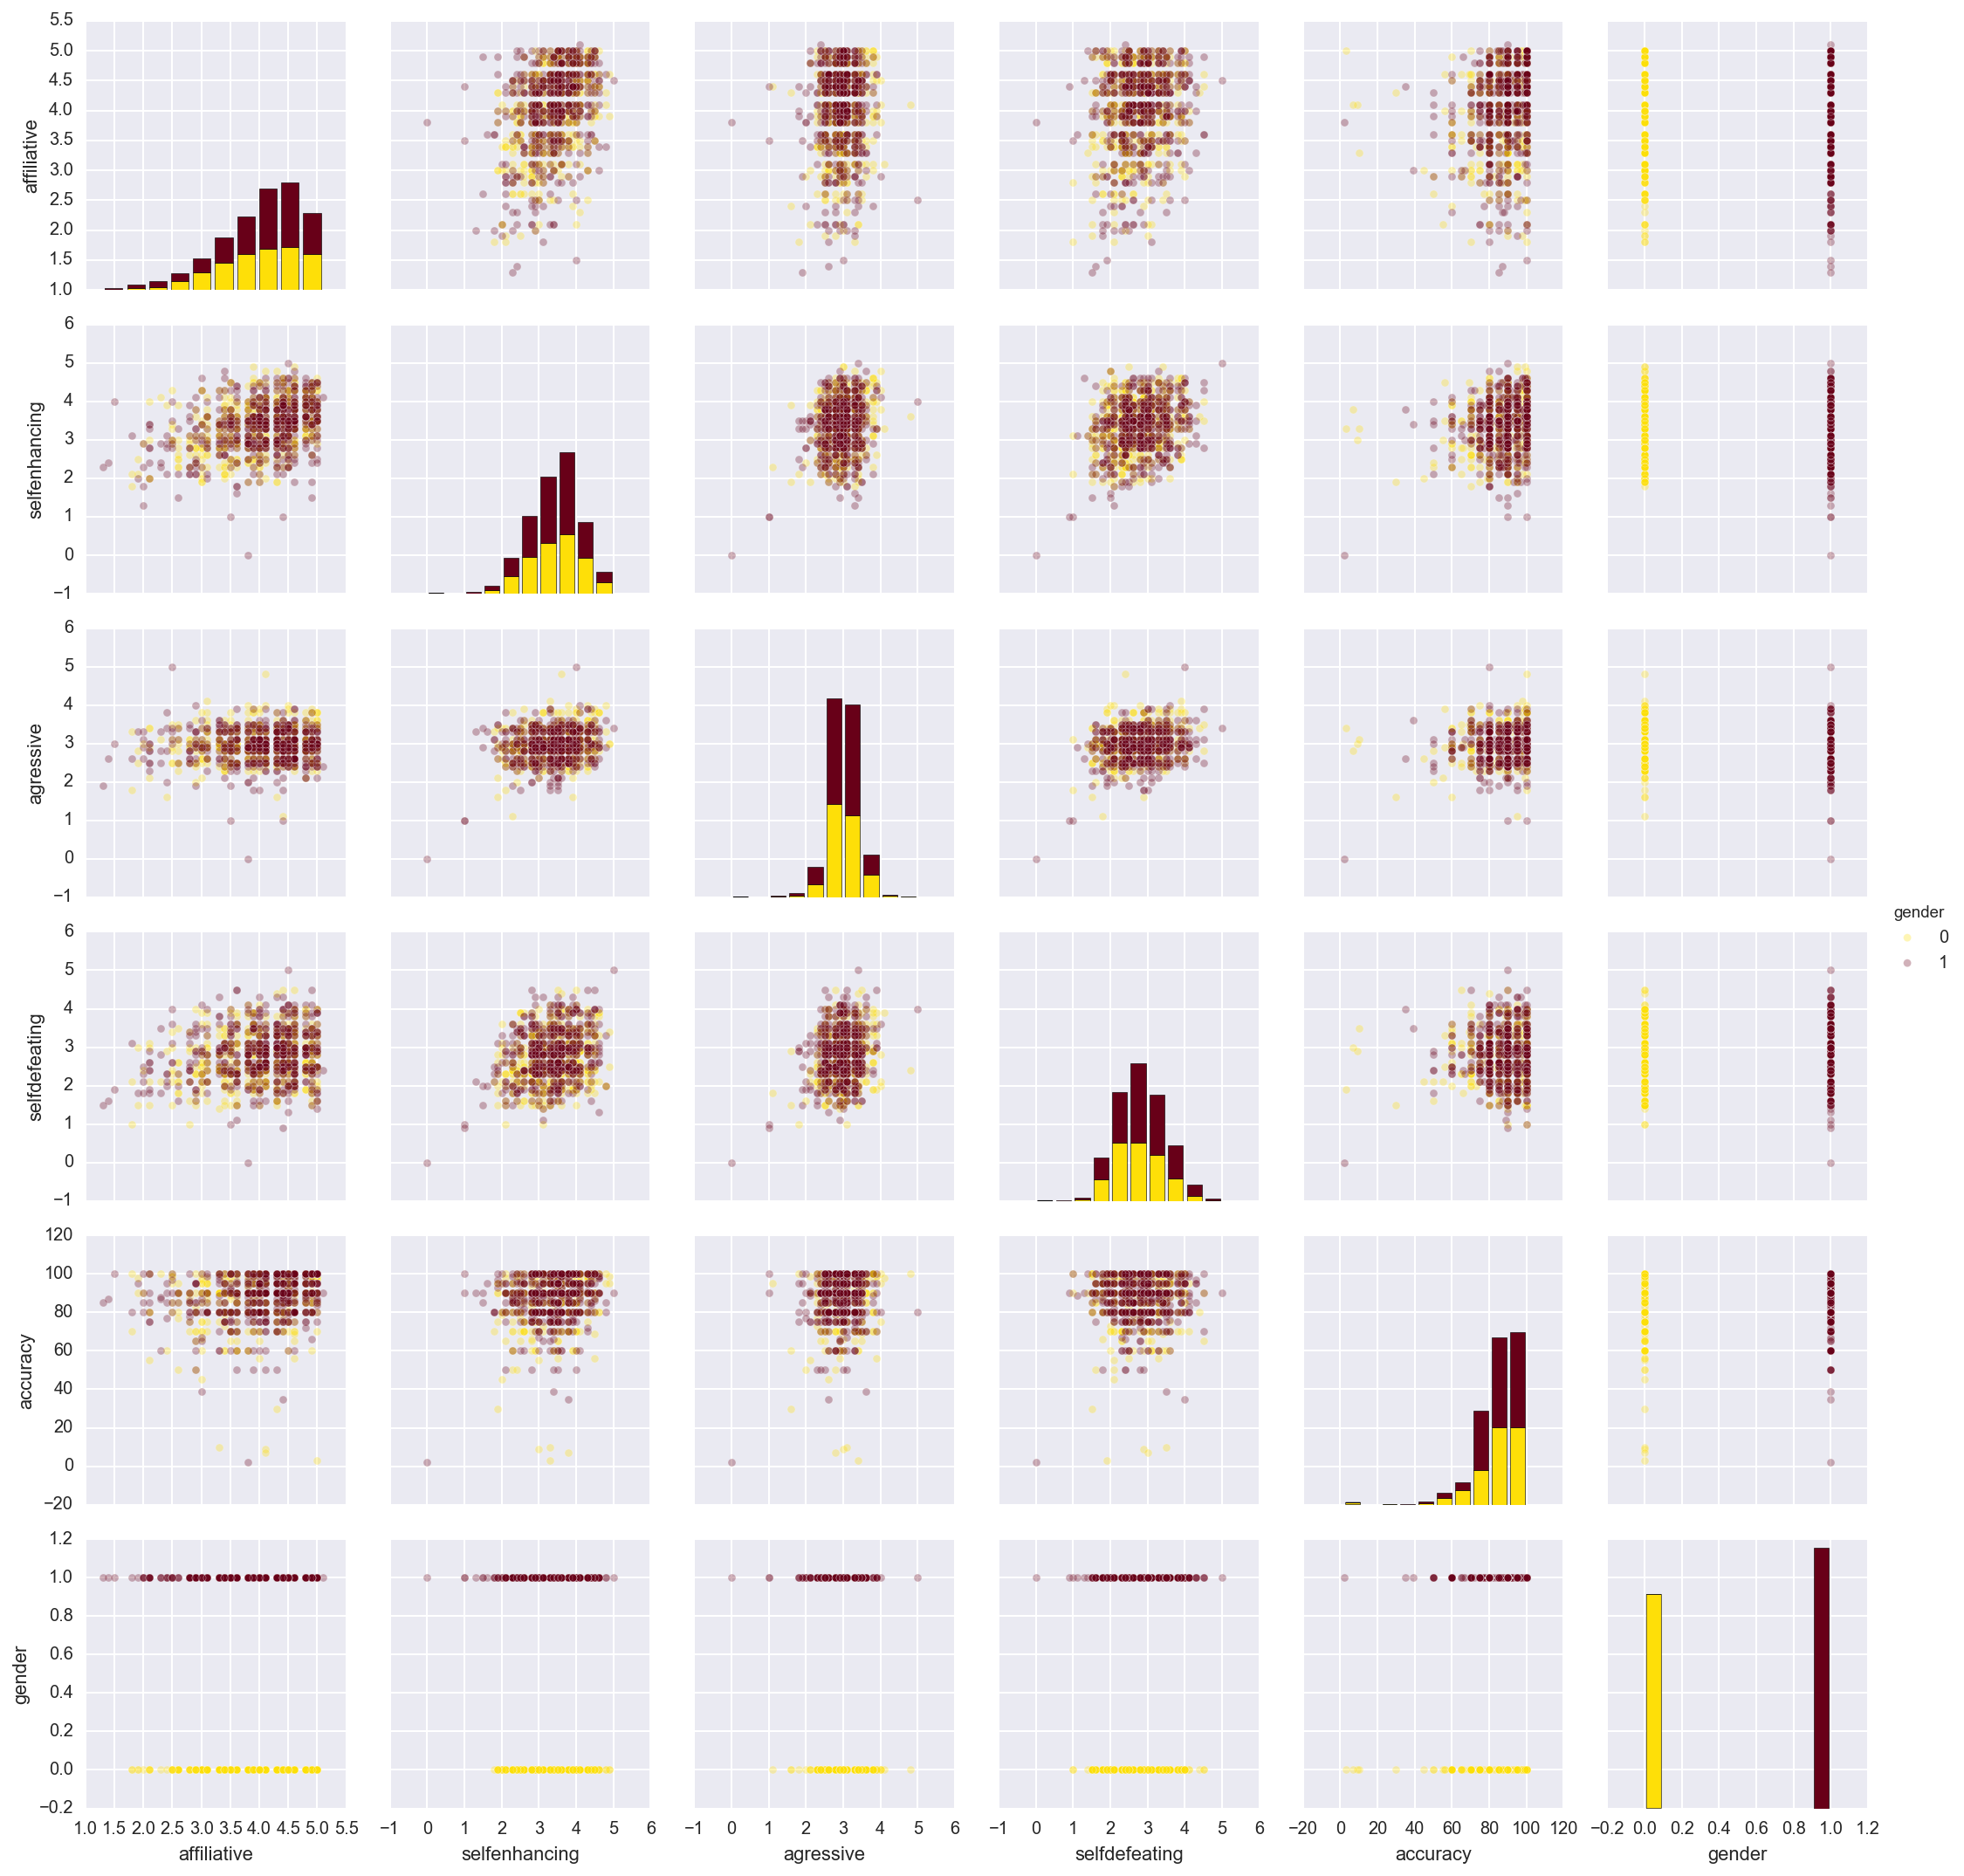

In [10]:
colors = sns.xkcd_palette(['dandelion', 'claret'])

sns.pairplot(data=hsq_subset,
             hue="gender", 
             palette={k:colors[k] for k in range(2)},
             plot_kws=dict(alpha=0.3))

---

### 4. Perform stratified cross-validation on a KNN classifier and logisitic regression.

1. Gridsearch the best KNN parameters.

Note: cross_val_score conveniently does stratification for you when you have a categorical target. :/ So much for forcing you to practice StratifiedKFold...

In [11]:
params = {
    'n_neighbors':range(1,101),
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()

knn_gs = GridSearchCV(knn, params, cv=5, verbose=1)
knn_gs.fit(X, y)

print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    4.3s


{'n_neighbors': 59, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished


In [12]:
cv_indices = StratifiedKFold(y, n_folds=5)

logreg = LogisticRegression()

lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = X[train_inds, :], y[train_inds]
    Xte, yte = X[test_inds, :], y[test_inds]
    
    best_knn.fit(Xtr, ytr)
    knn_scores.append(best_knn.score(Xte, yte))
    
    logreg.fit(Xtr, ytr)
    lr_scores.append(logreg.score(Xte, yte))
    
print 'KNN:'
print knn_scores
print np.mean(knn_scores)

print 'Logistic Regression:'
print lr_scores
print np.mean(lr_scores)

print 'Baseline accuracy:', np.mean(y)

KNN:
[0.59154929577464788, 0.56603773584905659, 0.61137440758293837, 0.56872037914691942, 0.52606635071090047]
0.572749633813
Logistic Regression:
[0.52112676056338025, 0.58490566037735847, 0.51658767772511849, 0.55924170616113744, 0.53080568720379151]
0.542533498406
Baseline accuracy: 0.549149338374


---

### 5. Regularization with logistic regression

Since logistic regression _is_ a regression, it can use the Lasso and Ridge penalties.

The `penalty` keyword argument can be set to `l2` for Ridge and `l1` for Lasso. 

Note: you must set `solver='liblinear'` if you're going to use the Lasso penalty!

**`C` is the regularization strength for LogisticRegression, but IT IS THE INVERSE OF ALPHA: 1/alpha. I don't know why they did this – it's stupid.**

1. Select everything but your target to be predictors.
- Normalize the predictors!
- Gridsearch the LogisticRegression with regularization.
- Gridsearch the KNN.
- Compare their cross-validated accuracies.

In [13]:
X = hsq[[col for col in hsq.columns if col != 'gender']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xn = ss.fit_transform(X)


In [14]:
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
print lr_gs.best_params_
best_lr = lr_gs.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   15.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   35.4s


{'penalty': 'l2', 'C': 81.632744897959185, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   39.3s finished


In [15]:
knn_gs = GridSearchCV(KNeighborsClassifier(), params, cv=10, verbose=1)

knn_gs.fit(Xn, y)

print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   13.6s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   19.6s


{'n_neighbors': 62, 'weights': 'distance'}


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   21.9s finished


In [16]:
cv_indices = StratifiedKFold(y, n_folds=5)

lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_knn.fit(Xtr, ytr)
    knn_scores.append(best_knn.score(Xte, yte))
    
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))
    
print 'KNN:'
print knn_scores
print np.mean(knn_scores)

print 'Logistic Regression:'
print lr_scores
print np.mean(lr_scores)

print 'Baseline accuracy:', np.mean(y)

KNN:
[0.63380281690140849, 0.57075471698113212, 0.63507109004739337, 0.56398104265402849, 0.57345971563981046]
0.595413876445
Logistic Regression:
[0.62441314553990612, 0.56132075471698117, 0.57345971563981046, 0.59241706161137442, 0.59715639810426535]
0.589753415122
Baseline accuracy: 0.549149338374


---

### 6. Explain why that regularization for logistic regression may have been chosen. Print out the most important variables for predicting your target from logistic regression.

In [17]:
coefs = pd.DataFrame({'coef':best_lr.coef_[0], 'abs_coef':np.abs(best_lr.coef_[0]),
                      'variable':[col for col in hsq.columns if col != 'gender']})
coefs.sort_values('abs_coef', ascending=False, inplace=True)

In [18]:
coefs

,abs_coef,coef,variable
34,2.183232,-2.183232,agressive
22,0.912374,0.912374,Q23
10,0.885685,0.885685,Q11
18,0.872845,0.872845,Q19
2,0.819745,0.819745,Q3
30,0.788326,0.788326,Q31
26,0.751402,0.751402,Q27
6,0.677639,0.677639,Q7
33,0.617634,0.617634,selfenhancing
14,0.381059,0.381059,Q15


In [19]:
print np.corrcoef(hsq.gender.values, hsq.agressive.values)

[[ 1.         -0.05138876]
 [-0.05138876  1.        ]]


The not-strong ridge indicates to me that the variables are decently independent (but some multicollinearity) and that they are all reasonably useful for out-of-sample prediction.

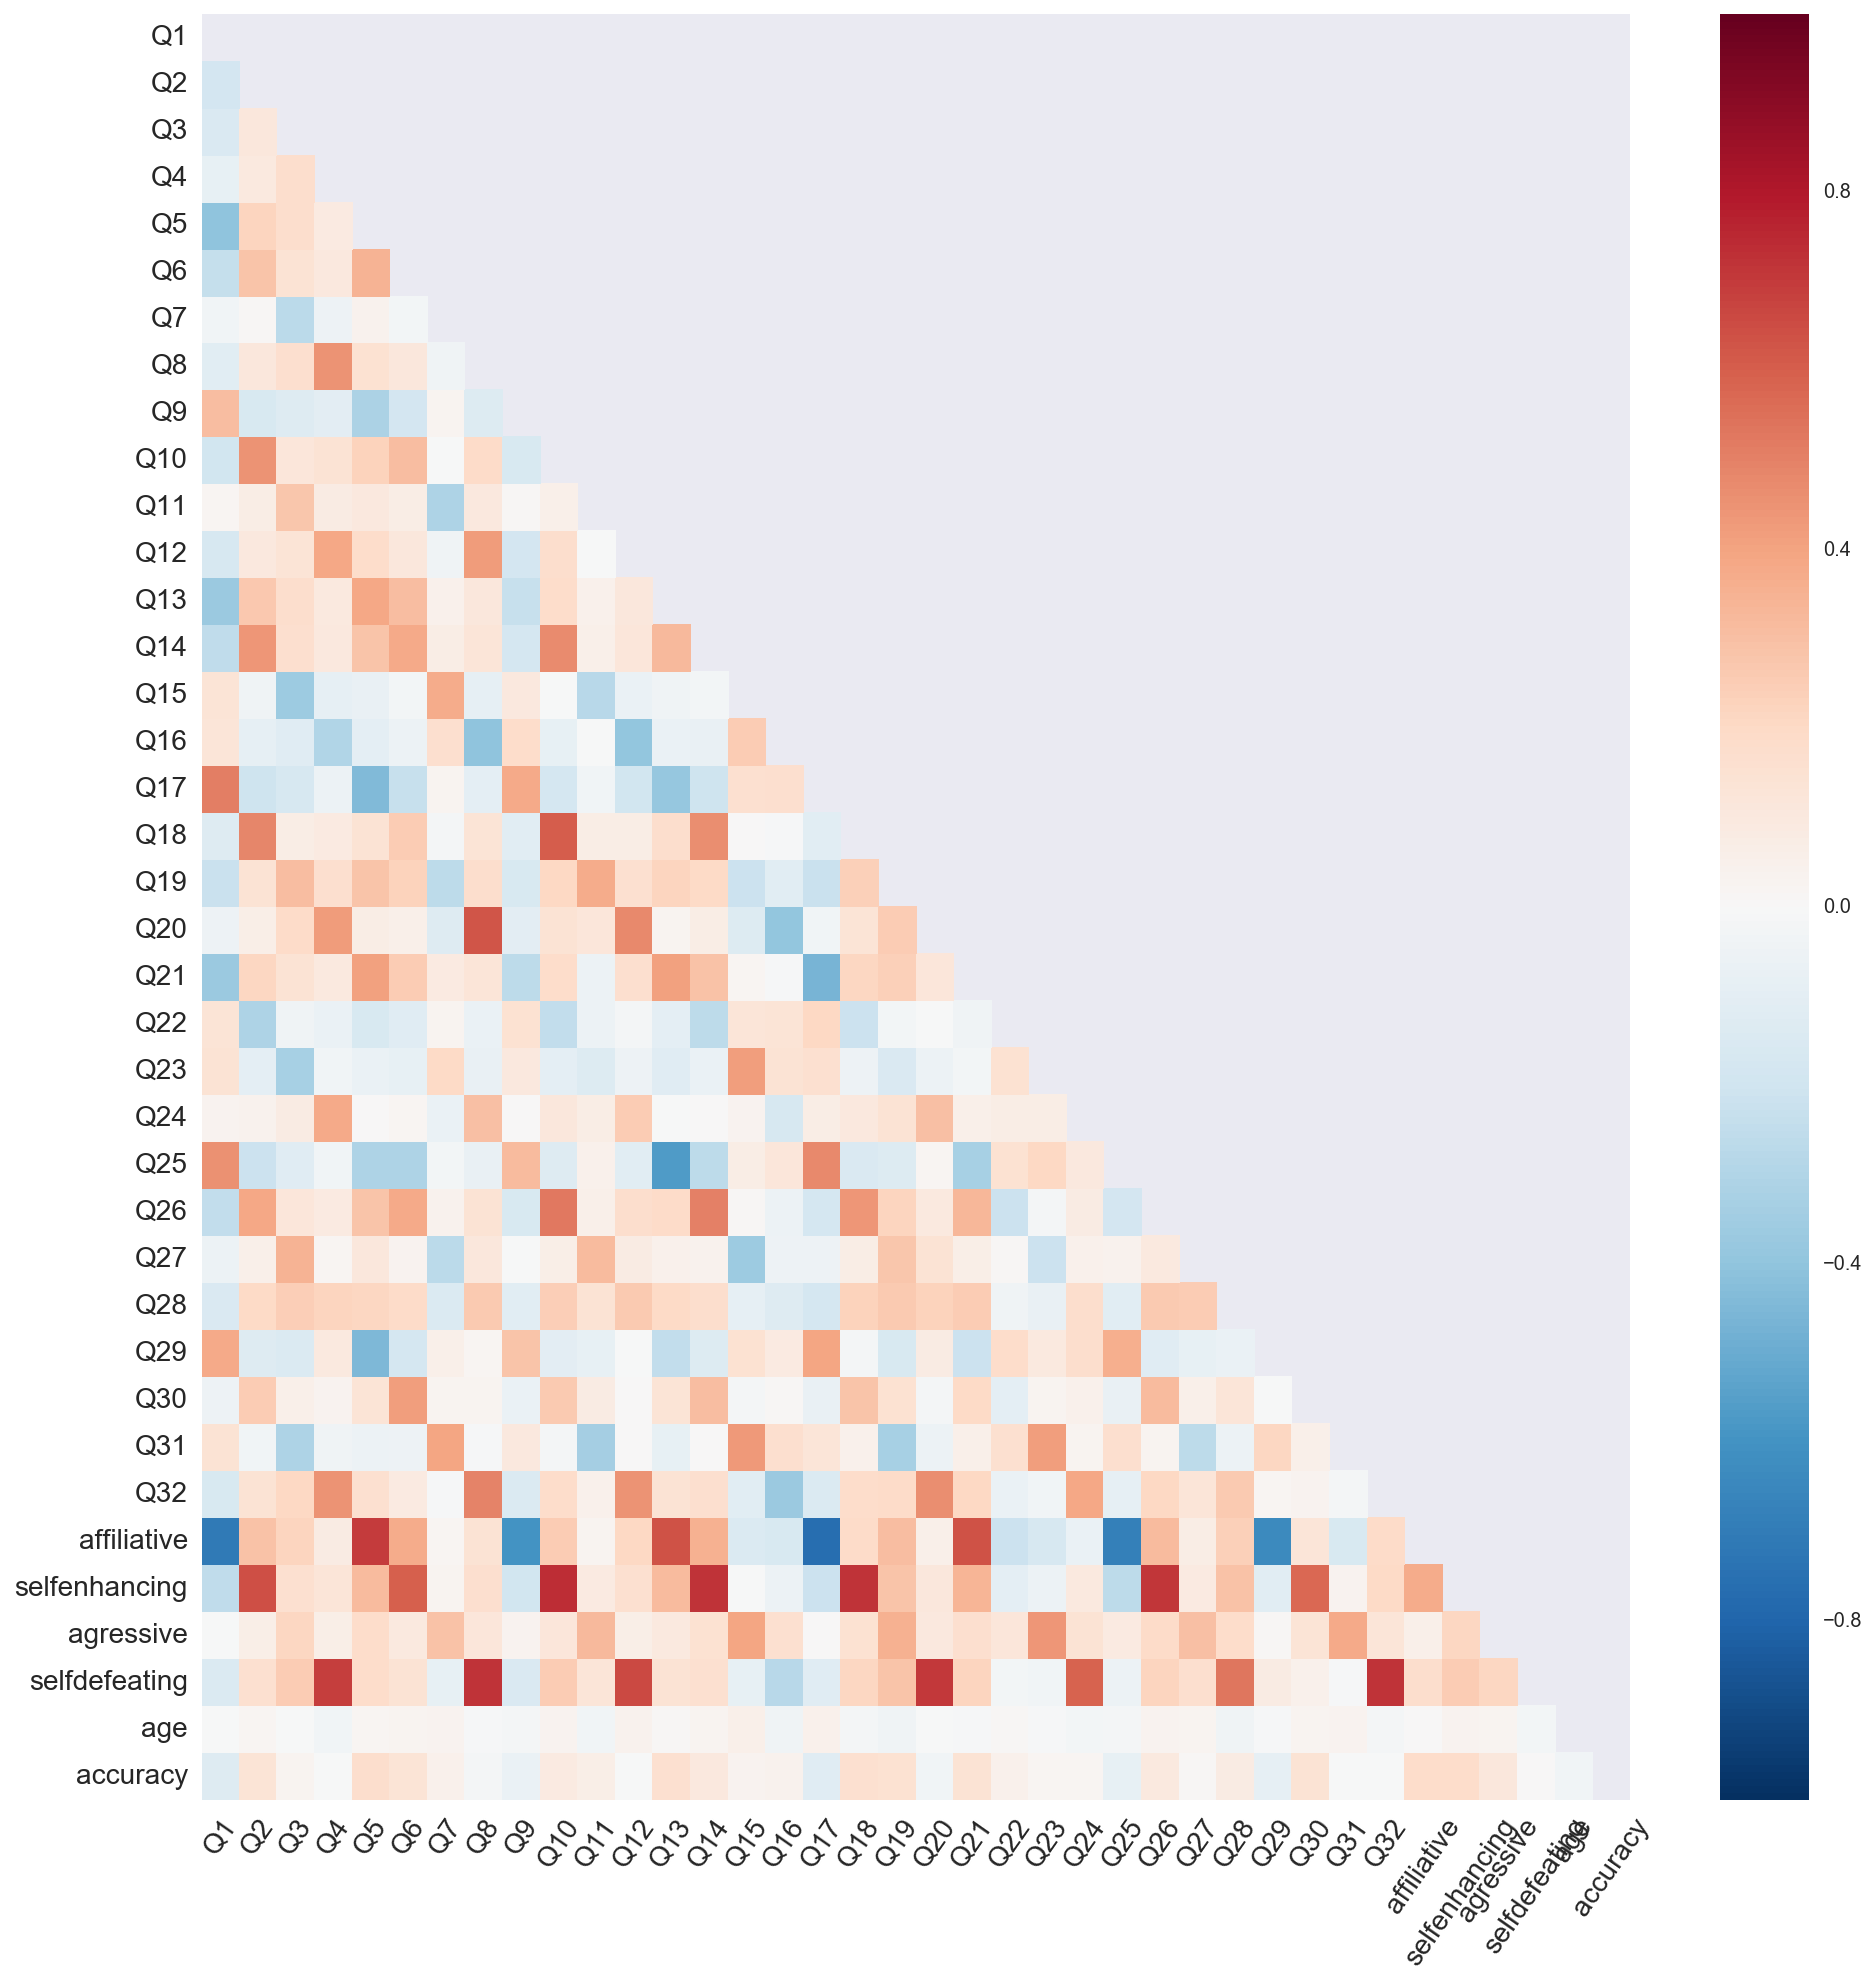

In [20]:
corrs = hsq[[col for col in hsq.columns if col != 'gender']].corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(16,16))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=55)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

---

### 7. Re-run a (non-regularized) logistic regression with only centered coefficients (not normalized). Interperet the baseline probability and the effect of one of your predictors.

**sklearn's LogisticRegression actually uses l2 Ridge regularization by default with `C=1`! To "turn it off" set `C=1e10`.**

1. Fit the logistic regression using centered predictors.
- Write a function to turn coefficient results to probability (logistic transformation).
- Describe the baseline probability.
- Plot the distribution of one of your predictors.
- Describe based on the coefficient of the predictor the effect on probability of your target variable.

In [21]:
Xc = X - X.mean()

In [22]:
lr_centered = LogisticRegression(C=1e10)

lr_centered.fit(Xc, y)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
coefs = pd.DataFrame({'coef':best_lr.coef_[0], 'abs_coef':np.abs(best_lr.coef_[0]),
                      'variable':[col for col in hsq.columns if col != 'gender']})
coefs.sort_values('abs_coef', ascending=False, inplace=True)
coefs

,abs_coef,coef,variable
34,2.183232,-2.183232,agressive
22,0.912374,0.912374,Q23
10,0.885685,0.885685,Q11
18,0.872845,0.872845,Q19
2,0.819745,0.819745,Q3
30,0.788326,0.788326,Q31
26,0.751402,0.751402,Q27
6,0.677639,0.677639,Q7
33,0.617634,0.617634,selfenhancing
14,0.381059,0.381059,Q15


In [24]:
def logistic_transformation(Xobs, b0, betas):
    regression_sum = b0 + np.sum(betas*Xobs)
    exponentiated = np.exp(regression_sum)
    return (exponentiated / (1 + exponentiated))[0]

In [25]:
print 'Baseline probability:', logistic_transformation(np.zeros(Xc.shape[1]),
                                                       lr_centered.intercept_,
                                                       lr_centered.coef_[0])

print 'Mean gender:', np.mean(y)

Baseline probability: 0.555242905556
Mean gender: 0.549149338374


Yes, the baseline probability is different than the mean of the target. This can happen! It's not wrong.

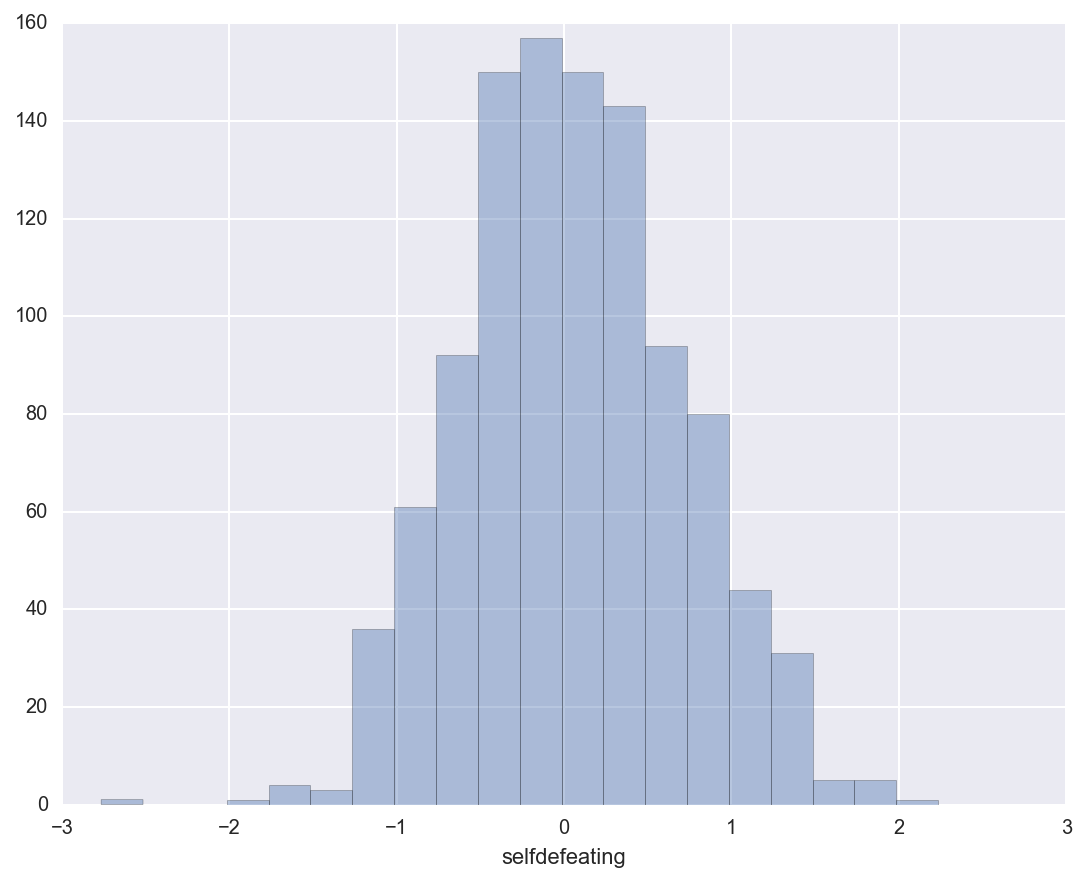

In [26]:
fig, ax = plt.subplots(figsize=(9,7))

sns.distplot(Xc.selfdefeating, bins=20, kde=False, ax=ax)

In [27]:
Xc.head(2)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q29,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,accuracy
0,-0.026465,-1.337429,-0.082231,-1.837429,0.395085,0.853497,0.714556,0.463138,1.420605,0.137051,...,-0.320416,0.064272,-0.768431,-0.844045,-0.011342,0.128922,0.042628,-0.464745,-4.165406,12.499055
1,-0.026465,-0.337429,-1.082231,-0.837429,0.395085,-0.146503,0.714556,0.463138,1.420605,0.137051,...,1.679584,0.064272,0.231569,-1.844045,-0.711342,0.128922,0.342628,-0.364745,14.834594,2.499055


In [28]:
selfd0 = 0. - np.mean(X.selfdefeating)
selfd5 = 5. - np.mean(X.selfdefeating)

betas_d0 = np.zeros(Xc.shape[1])
betas_d5 = np.zeros(Xc.shape[1])

betas_d0[-3] = selfd0
betas_d5[-3] = selfd5

print 'P(male | most selfdefeating):', logistic_transformation(betas_d0,
                                                               lr_centered.intercept_,
                                                               lr_centered.coef_[0])

print 'P(male | least selfdefeating):', logistic_transformation(betas_d5,
                                                                lr_centered.intercept_,
                                                                lr_centered.coef_[0])

P(male | most selfdefeating): 0.038028375381
P(male | least selfdefeating): 0.953166754949
